In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('afterPreprocess.csv')
df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Slight,Male,23
1,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Driver or rider,Slight,Male,23
2,5110577,430660,430766,1,2018-01-01,03:44:00,Unclassified,U,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Vehicle or pillion passenger,Serious,Male,33
3,5111304,431442,432717,2,2018-01-01,13:35:00,A,A63,Dry,Daylight: street lights present,Fine without high winds,E08000035,Car,Driver or rider,Slight,Female,57
4,5111365,429509,431308,2,2018-01-01,14:21:00,Unclassified,U,Wet / Damp,Daylight: street lights present,Raining without high winds,E08000035,Car,Vehicle or pillion passenger,Slight,Male,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,6CU0181,442094,434619,1,2019-12-30,04:22:00,Motorway,M1,Wet / Damp,Darkness: street lights present and lit,Fine with high winds,E08000035,Car,Driver or rider,Slight,Male,27
3896,6CU0363,423019,437653,1,2019-12-30,10:00:00,A,A65,Frost / Ice,Daylight: street lights present,Fine without high winds,E08000035,Motorcycle over 500cc,Driver or rider,Serious,Male,36
3897,6CV1518,421466,433999,3,2019-12-31,16:40:00,A,A647,Dry,Darkness: street lights present and lit,Fine without high winds,E08000035,Car,Driver or rider,Slight,Male,41
3898,6CV0723,436853,442515,2,2019-12-31,13:40:00,A,A58,Dry,Daylight: street lights present,Fine without high winds,E08000035,Pedal cycle,Driver or rider,Serious,Male,59


# Số vụ tai nạn chiếm đa phần là tai nạn xe hơi với mức độ tai nạn là Nhẹ

In [3]:
type_of_vehicle = df['Type of Vehicle'].unique().tolist()
casualty_severity = df['Casualty Severity'].unique().tolist()

matrix = np.zeros((len(type_of_vehicle), len(casualty_severity)))

for i in range(len(df)):
    x = type_of_vehicle.index(df['Type of Vehicle'][i])
    y = casualty_severity.index(df['Casualty Severity'][i])
    matrix[x][y] = matrix[x][y] + 1
matrix = matrix.astype('int')

In [4]:
matrix_df = pd.DataFrame(matrix, index = type_of_vehicle, columns = casualty_severity)
matrix_df

,Slight,Serious,Fatal
Car,2197,323,33
Pedal cycle,404,123,3
Motorcycle over 125cc and up to 500cc,22,26,0
Motorcycle over 500cc,35,41,2
Taxi/Private hire car,117,14,0
M/cycle 50cc and under,25,8,0
Bus or coach (17 or more passenger seats),168,24,0
Other Vehicle,4,2,0
Goods vehicle 3.5 tonnes mgw and under,111,16,2
Motorcycle over 50cc and up to 125cc,77,55,6


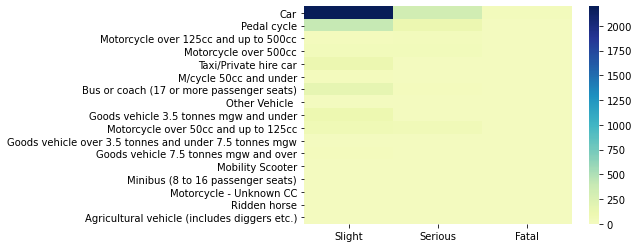

In [5]:
ax = sns.heatmap(matrix_df, center = 1000, cmap="YlGnBu")

In [6]:
result = np.where(matrix == matrix.max())
print('Most cases happened with', type_of_vehicle[result[0][0]], 'and casulty severity is:', casualty_severity[result[1][0]])

Most cases happened with Car and casulty severity is: Slight


# Số vụ tai nạn chiếm đa phần là trên mặt đường Khô với mức độ tai nạn là Nhẹ

In [7]:
road_surface = df['Road Surface'].unique().tolist()
casualty_severity = df['Casualty Severity'].unique().tolist()

matrix = np.zeros((len(road_surface), len(casualty_severity)))

for i in range(len(df)):
    x = road_surface.index(df['Road Surface'][i])
    y = casualty_severity.index(df['Casualty Severity'][i])
    matrix[x][y] = matrix[x][y] + 1
matrix = matrix.astype('int')

In [8]:
matrix_df = pd.DataFrame(matrix, index = road_surface, columns = casualty_severity)
matrix_df

,Slight,Serious,Fatal
Wet / Damp,759,170,17
Dry,2392,462,31
Snow,22,3,0
Frost / Ice,30,7,0
Flood (surface water over 3cm deep),5,2,0


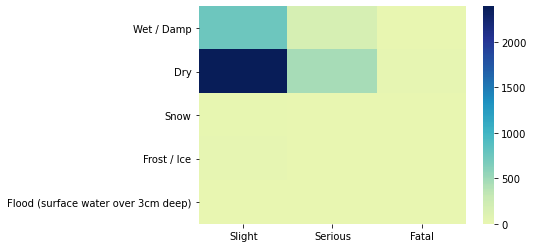

In [9]:
ax = sns.heatmap(matrix_df, center = 1000, cmap="YlGnBu")

In [10]:
result = np.where(matrix == matrix.max())
print('Most cases happened on', road_surface[result[0][0]], 'road and casulty severity is:', casualty_severity[result[1][0]])

Most cases happened on Dry road and casulty severity is: Slight
